In [5]:
# Disable warnings
import warnings
warnings.filterwarnings('ignore')

import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import matplotlib        as mpl
%matplotlib inline

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.ensemble        import RandomForestClassifier,RandomForestRegressor

# Plot settings
mpl.rcParams['legend.frameon' ] = False
mpl.rcParams['legend.fontsize'] = 'xx-large'
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['axes.titlesize' ] = 18
mpl.rcParams['axes.labelsize' ] = 18
mpl.rcParams['lines.linewidth'] = 2.5

In [6]:
data = pd.read_csv('4topSM.csv')
df = pd.DataFrame(data)
cols = df.columns.tolist()
cols = cols[1:-1] + [cols[0]]
df = df[cols]
df.head()

,ht,njet,nbjet,nlep,met,met_phi,lep_pt0,lep_pt1,lep_pt2,lep_pt3,...,jet_isb0,jet_isb1,jet_isb2,jet_isb3,jet_isb4,jet_isb5,jet_isb6,jet_isb7,jet_isb8,m4top
0,363.195618,6,3,0,77.773085,1.056524,0.000000,0.000000,0.000000,0.0,...,0,0,1,1,0,1,0,0,0,1480.240498
1,739.406982,9,5,0,80.217866,-2.799677,0.000000,0.000000,0.000000,0.0,...,0,0,1,1,0,1,0,1,1,1279.838371
2,756.153748,9,5,1,51.067984,1.685508,125.348915,0.000000,0.000000,0.0,...,0,0,1,1,0,1,0,1,1,995.802801
3,708.742126,5,2,2,93.307299,3.023522,40.827286,169.840958,0.000000,0.0,...,0,0,1,1,0,1,0,1,1,1382.241903
4,567.742065,5,2,3,193.714731,2.289553,105.930557,25.705399,83.422684,0.0,...,0,0,1,1,0,1,0,1,1,2706.690433


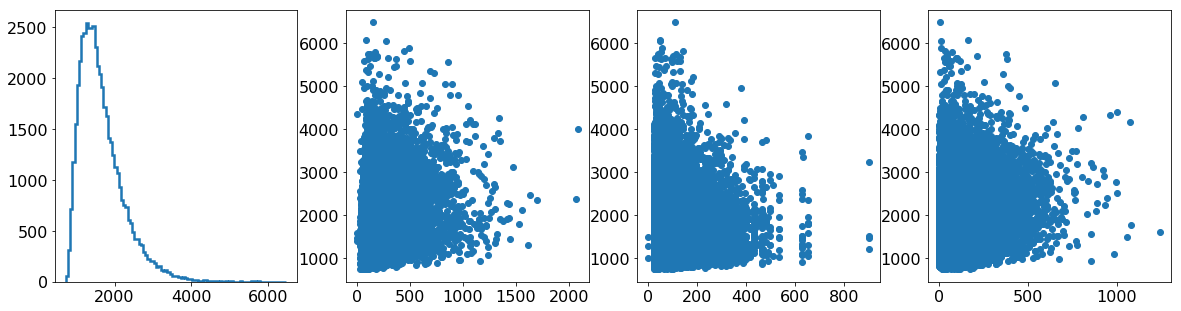

In [7]:
plt.figure(figsize=(20,5))
plt.subplot(141)
plt.hist(df['m4top'], bins=100, histtype='step', linewidth=2.5)
plt.subplot(142)
plt.scatter(df['jet_pt1'],df['m4top'])
plt.subplot(143)
plt.scatter(df['lep_pt1'],df['m4top'])
plt.subplot(144)
plt.scatter(df['met'],df['m4top'])

In [8]:
# Features and target
dataX = df.drop('m4top',axis=1)
dataY = df['m4top']

# Preparing cross validation samples
trainX, testX, trainY, testY = train_test_split(dataX, dataY, random_state=42, train_size=0.5)

In [9]:
rf_regre = RandomForestRegressor(n_estimators=500,n_jobs=-1).fit(trainX, trainY)

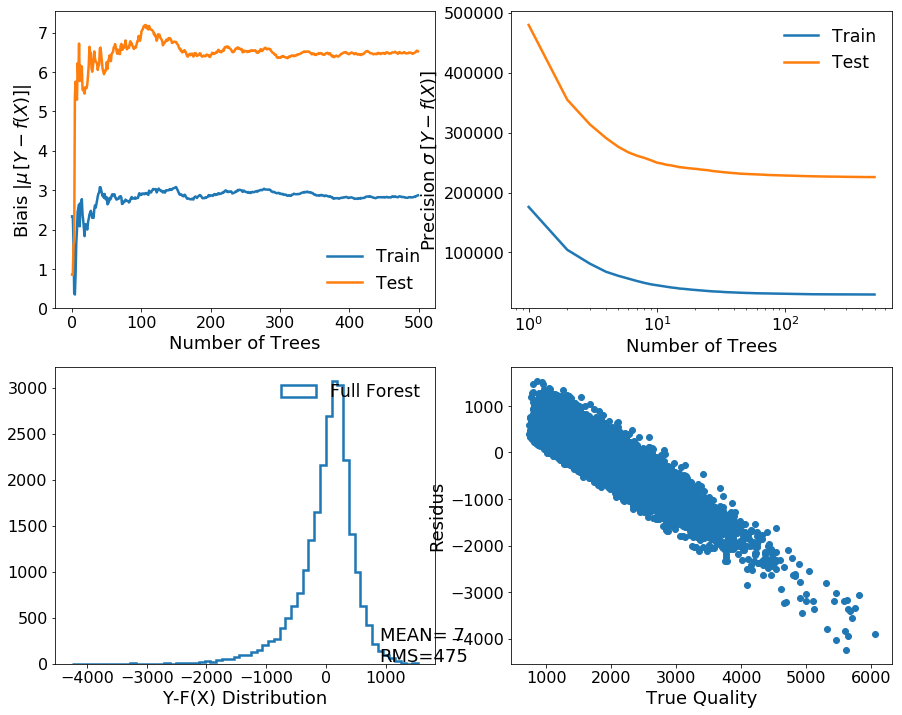

In [11]:
plt.figure(figsize=(15,12))

# 1. Check how the algorithm behaves with the number of trees
for sX, sY, label in [(trainX, trainY, 'Train'), (testX, testY, 'Test')]:
    predictions = np.zeros(len(sX))
    curve_rms   = []
    curve_mean  = []
    
    predictions = np.array( [tree.predict(sX) for tree in rf_regre.estimators_] )
    for i in range(0,rf_regre.n_estimators):
        if (i==0):
            Ypred=predictions[0]
        else:
            prediction_i = predictions[0:i]
            Ypred = np.average(prediction_i,axis=0)
            
        curve_rms .append( np.var(Ypred-sY) )
        curve_mean.append( np.abs(np.average(Ypred-sY)) )

    plt.subplot(221)
    plt.plot(curve_mean,label=label)
    plt.xlabel('Number of Trees')
    plt.ylabel('Biais $|\mu\,[Y-f(X)]|$')
    plt.legend()
    
    plt.subplot(222)
    plt.plot(curve_rms,label=label)
    plt.ylabel('Precision $\sigma\,[Y-f(X)]$')
    plt.xlabel('Number of Trees')
    plt.semilogx()
    plt.legend()

# 2. Plot the distribution for the final prediction    
Ypred = rf_regre.predict(testX)
Ytrue = testY
plt.subplot(223)
plt.xlabel('Y-F(X) Distribution')
plt.hist( Ypred-Ytrue ,bins=60, histtype='step', linewidth=2.5, label='Full Forest')
plt.text(900, 25, 'MEAN={:2.0f}\nRMS={:2.0f}'.format( np.average(Ypred-Ytrue), np.sqrt(np.var(Ypred-Ytrue)) ), fontsize=18)
plt.legend()

plt.subplot(224)
plt.xlabel('True Quality')
plt.ylabel('Residus')
plt.plot( Ytrue, Ypred-Ytrue, 'o')

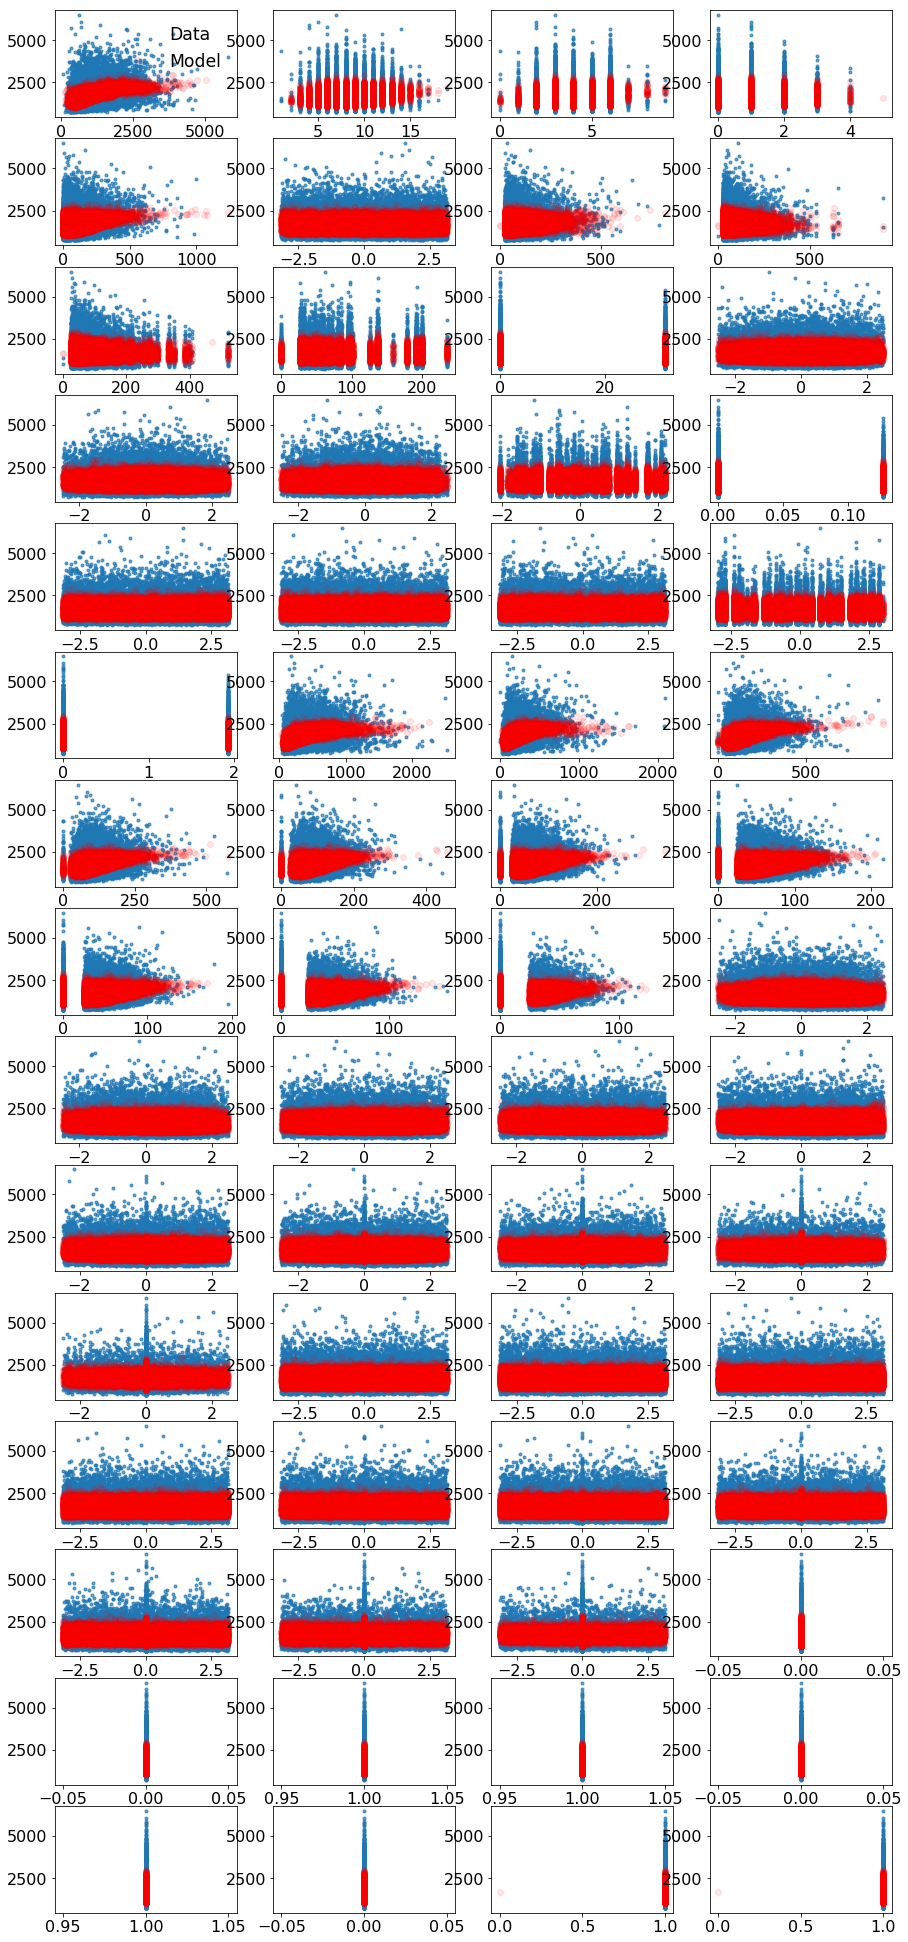

In [15]:
ymodel=rf_regre.predict(testX)

i=0
plt.figure(figsize=(15,35))
for varname in testX.columns:
    i=i+1
    x=testX[varname]
    plt.subplot(15,4,i)
    plt.plot(trainX[varname],trainY,'.',alpha=0.7, label='Data')
    plt.plot(testX[varname],ymodel,'ro',alpha=0.1,label='Model')  
    if (i==1):
        plt.legend()

(array([   2.,    9.,   21.,   34.,   60.,   79.,  125.,  183.,  236.,
         252.,  265.,  344.,  339.,  381.,  389.,  464.,  460.,  513.,
         527.,  531.,  562.,  526.,  502.,  570.,  553.,  570.,  608.,
         621.,  603.,  618.,  582.,  596.,  572.,  623.,  569.,  568.,
         579.,  549.,  539.,  481.,  474.,  518.,  447.,  423.,  489.,
         437.,  393.,  389.,  362.,  377.,  291.,  320.,  319.,  276.,
         258.,  234.,  210.,  228.,  190.,  183.,  178.,  138.,  180.,
         114.,  109.,  105.,   99.,   84.,   89.,   79.,   55.,   52.,
          55.,   38.,   33.,   31.,   17.,   23.,   14.,   17.,    8.,
          10.,   10.,    4.,    4.,    5.,    3.,    4.,    4.,    2.,
           4.,    1.,    1.,    0.,    1.,    1.,    0.,    2.,    1.,    1.]),
 array([ 1011.23905198,  1030.65505336,  1050.07105474,  1069.48705613,
         1088.90305751,  1108.31905889,  1127.73506027,  1147.15106165,
         1166.56706304,  1185.98306442,  1205.3990658 ,  1224.8150

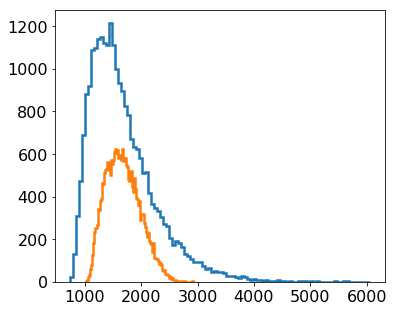

In [16]:
plt.figure(figsize=(13,5))
plt.subplot(121)
plt.hist(testY ,bins=100, histtype='step', linewidth=2.5)
plt.hist(ymodel,bins=100, histtype='step', linewidth=2.5)